In [318]:
# compare phase vs. percent transition
# compare amplitude vs. percent transition

In [319]:
import sys
import rosbag
import matplotlib.pyplot as plt
import numpy as np

In [320]:
# obtain percent transition vs. time
def getWeights(filename):
    weights = []
    times = []
    bag = rosbag.Bag(filename)
    for topic, msg, t in bag.read_messages(topics=["/roboy_dep/linear_combination"]):
        weights.append(msg.weights)
        times.append(t.to_sec())
    bag.close()
    return np.array(weights), np.array(times)

In [321]:
filename = "/home/roboy/dep_data/data/combination/10FB04FS_04FB10FS_200s_2017-10-18-12-50-31.bag"

In [322]:
weights, times = getWeights(filename)

In [323]:
# obtain data from file
def getData(filename):
    position_to_rads = 2.0*3.14159/(2000.0*53.0);
    displacement_to_N = 0.237536
    time = []
    pos = []
    force = []
    bag = rosbag.Bag(filename)
    for topic, msg, t in bag.read_messages(topics=["/roboy/middleware/MotorStatus"]):
        pos.append(msg.position)
        force.append(msg.displacement)
        time.append(t.to_sec())
    bag.close()
    time = np.array(time)
    pos = np.array(pos)*position_to_rads
    force = np.array(force)*displacement_to_N
    return time, pos, force

In [324]:
time, pos, force = getData(filename)

In [325]:
# obtain peaks of given muscle data
from scipy.signal import argrelextrema
def getPeaks(position):
    indices = np.array(argrelextrema(position, np.less))
    return indices

We can calculate an approximate phase of a given muscle relative to its counter part in a given behavior by: 
1. calculating the relative position of the muscle in comparison with an unchanging muscle through comparing time difference between peaks, 
2. calculating the original time difference between peaks for the muscle in the original behavior, and 
3. calculating a phase by comparing the total time difference relative to the period

##### Obtaining muscle and reference peak indices

In [326]:
def movingAvg(data, window_size):
    a = data
    b = data
    for i in range(len(a)):
        b[i] = np.ma.average(a[np.clip(i-int(window_size/2),0,len(a)):np.clip(i+int(window_size/2),0,len(a))])
    return b

In [327]:
# For FB to FS
# change muscle = muscle 2 i.e. position[:,3]
muscle = pos[:,3]
muscle_peaks = getPeaks(muscle)[0]
# reference muscle = muscle 5 i.e. position[:,5]
ref = pos[:,5]
ref_peaks = getPeaks(ref)[0]

# target muscle has 3 peaks after end of experiment -> remove these
muscle_peaks = muscle_peaks[:-3]
# reference muscle has 4 peaks after end of experiment -> remove these
ref_peaks = ref_peaks[:-4]


In [328]:
muscle_peaks.shape

(77,)

In [329]:
awd = movingAvg(muscle,1000)
getPeaks(awd).size

79

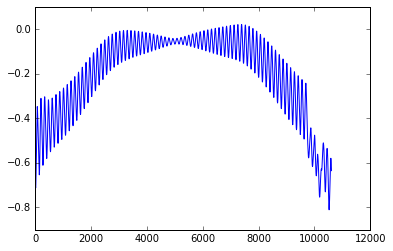

In [330]:
plt.figure(1)
plt.plot(awd)
plt.show()

In [268]:
print ref_peaks.shape, muscle_peaks.shape

(73,) (73,)


In [239]:
avg_dist = np.ma.average((ref_peaks-np.roll(ref_peaks,1))[1:])
std_dist = np.std((ref_peaks-np.roll(ref_peaks,1))[1:])
print avg_dist, std_dist

136.569444444 25.1450383823


##### Behavior period and reference distance

In [217]:
avg_period = (1358.5-717.0)/5
dist = 758.0 - 808.0

##### Phase plot

In [227]:
y = ((muscle_peaks-ref_peaks)-dist)/avg_dist*360
y

array([-109.55265797,  -96.19257773, -104.20862588, -101.53660983,
       -101.53660983, -104.20862588, -104.20862588, -106.88064193,
       -106.88064193, -106.88064193, -106.88064193, -106.88064193,
       -109.55265797, -112.22467402, -112.22467402, -114.89669007,
       -114.89669007, -117.56870612, -117.56870612, -117.56870612,
       -120.24072217, -120.24072217, -120.24072217, -120.24072217,
       -122.91273821, -122.91273821, -122.91273821, -122.91273821,
       -122.91273821, -122.91273821, -122.91273821, -122.91273821,
       -122.91273821, -122.91273821, -122.91273821, -120.24072217,
       -117.56870612, -109.55265797,  -90.84854564,    8.01604814,
         37.40822467,   40.08024072,   42.75225677,   45.42427282,
         45.42427282,   48.09628887,   48.09628887,   48.09628887,
         50.76830491,   48.09628887,   50.76830491,   50.76830491,
         53.44032096,   50.76830491,   53.44032096,   53.44032096,
         53.44032096,   56.11233701,   56.11233701,   58.78435

In [225]:
x = np.around(times[muscle_peaks]-times[0],2)

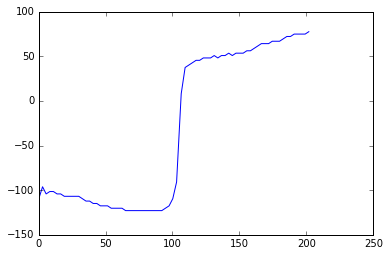

In [226]:
plt.figure(1)
plt.plot(x,y)
plt.show()